In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [2]:
# Format to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_train = pd.read_csv(r'C:\Users\Angela\Documents\Fast_Trip\KC_90_df_train2.csv')
df_test = pd.read_csv(r'C:\Users\Angela\Documents\Fast_Trip\KC_90_df_test2.csv')

# Read data, training (70%) and validating (30%) dataset 

In [4]:
df_train.columns[:40]

Index([u'Unnamed: 0', u'TRIP_ID', u'RTE', u'VEHICLE_ID', u'BUS_TYPE',
       u'NUM_DOORS', u'STOP_SEQ', u'STOP_ID', u'DWELL_SEC', u'DOOR_OPEN_SEC',
       u'ONS', u'OFFS', u'LOAD', u'date_id', u'capacity', u'Route Type',
       u'pre_load', u'downtown_stop', u'Artic', u'twodoors', u'threedoors',
       u'twodoors_artic', u'threedoors_artic', u'E', u'R', u'ON+OFF',
       u'ma_pasg', u'ab_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'On_twodoors_artic', u'Off_twodoors_artic', u'on_threedoors_artic',
       u'off_threedoors_artic', u'on_express', u'off_express', u'on_rapid',
       u'off_rapid', u'vehno_date'],
      dtype='object')

# Build multi-linear regression model

# Model 1 - with vehicle ids

Create a LinearRegression object 

In [54]:
# Run Linear Regression In Python SciKit-Learn
start = timeit.default_timer()
#df_train = df_train.dropna()
#df_test = df_test.dropna()
X_train = df_train.drop(['TRIP_ID','RTE','VEHICLE_ID', 'BUS_TYPE', 'NUM_DOORS','STOP_SEQ',\
                         'STOP_ID','DWELL_SEC','DOOR_OPEN_SEC', 'pre_load', 'LOAD', 'date_id', 'capacity', \
                         'downtown_stop', 'ON+OFF', 'Artic','twodoors', 'threedoors', 'ma_pasg','ab_pasg', \
                         'pre_standees', 'pre_crowding','vehno_date', 'Route Type'], axis=1)

X_test = df_test.drop(['TRIP_ID','RTE','VEHICLE_ID', 'BUS_TYPE', 'NUM_DOORS','STOP_SEQ',\
                         'STOP_ID','DWELL_SEC','DOOR_OPEN_SEC', 'pre_load','LOAD', 'date_id', 'capacity', \
                         'downtown_stop', 'ON+OFF', 'Artic','twodoors', 'threedoors', 'ab_pasg','ma_pasg',\
                        'pre_standees', 'pre_crowding','vehno_date', 'Route Type'], axis=1)

y_train = df_train.DOOR_OPEN_SEC
y_test = df_test.DOOR_OPEN_SEC

stop = timeit.default_timer()
print 'prepare x,y for regression:', stop - start

prepare x,y for regression: 2.71861521516


In [55]:
start = timeit.default_timer()
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
pred_train = lm1.predict(X_train)
pred_test = lm1.predict(X_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results1 = pd.DataFrame(zip(X_train.columns, lm1.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X_train, y_train)
sklearn_results1['pvalues'] = pd.DataFrame(pvalues)
sklearn_results1['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 67.0672760185


In [56]:
sklearn_results1

,features,estimatedCoefficients,pvalues,scores
0,Unnamed: 0,0.000,0.000,42481648.389
1,ONS,3.112,0.000,433364.730
2,OFFS,1.346,0.000,139922.262
3,twodoors_artic,1.414,0.000,1099.346
4,threedoors_artic,7.011,0.000,2783.779
5,E,1.250,0.000,1458.303
6,R,-2.957,0.000,1684.772
7,friction,-0.051,0.000,126115.825
8,On_twodoors_artic,-0.344,0.000,209518.855
9,Off_twodoors_artic,-0.319,0.000,74483.067


In [57]:
R = r2_score(y_train, pred_train) 
print R

0.470263562366


# Correlation 

In [ ]:
c = X_train.corr().abs()
s = c.unstack()
so = s.order(kind="quicksort")

In [ ]:
print len(so)
soo = so.dropna()
soo = soo[soo >= 0.500]
soo = soo[soo != 1.0]
print len(soo)

In [ ]:
soo

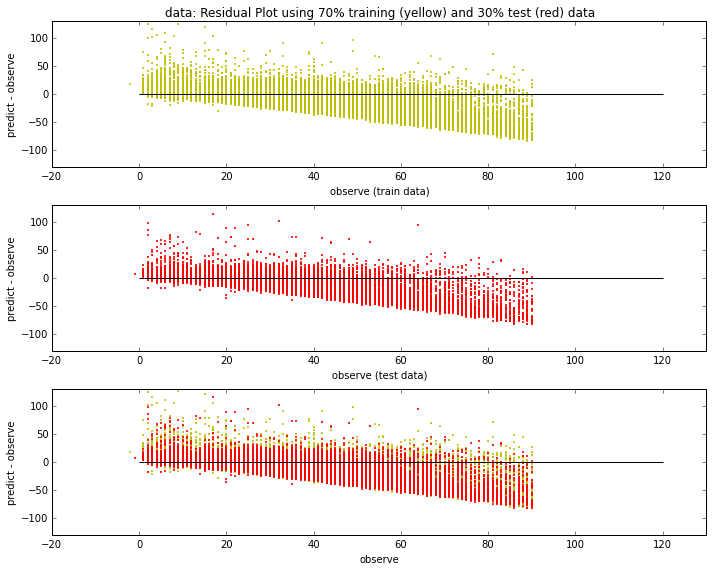

In [9]:
plt.figure(1)

plt.subplot(311)
plt.scatter(y_train, lm1.predict(X_train) - y_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.title('data: Residual Plot using 70% training (yellow) and 30% test (red) data')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data)')

plt.subplot(312)
plt.scatter(y_test, lm1.predict(X_test) - y_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data)')

plt.subplot(313)
plt.scatter(y_train, lm1.predict(X_train) - y_train, c='y', s=1, edgecolor='y')
plt.scatter(y_test, lm1.predict(X_test) - y_test, c='r', s=1, edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe')

plt.tight_layout()
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [ ]:
plt.figure(1)

plt.scatter(y_train, lm1.predict(X_train), c='y', s=1,edgecolor='g')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 130, -30, 130])
plt.title('Train data: observed and predicted data comparison')
plt.ylabel('predict')
plt.xlabel('observe')
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [ ]:
'''
x = y_test
y = lm1.predict(X_test)

# Calculate the point density
start = timeit.default_timer()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
stop = timeit.default_timer()
print 'finished calculating z:', stop - start

# Sort the points by density, so that the densest points are plotted last
start = timeit.default_timer()
idx = z.argsort()
stop = timeit.default_timer()
print 'finished sorting data:', stop - start

x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=5, edgecolor='')
plt.axis([0, 130, 0, 130])
plt.title('Test data: scatter plot colored by density')
plt.ylabel('predict')
plt.xlabel('observe')
plt.show()
'''

# Model2 - without vehicle ID

In [4]:
X2_train = df_train[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'E', 'R', 
                     'friction','On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 'on_express', 
                     'off_express', 'on_rapid', 'off_rapid']]

X2_test = df_test[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'E', 'R', 
                     'friction','On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 'on_express', 
                     'off_express', 'on_rapid', 'off_rapid']]
y2_train = df_train.DOOR_OPEN_SEC
y2_test = df_test.DOOR_OPEN_SEC

In [5]:
start = timeit.default_timer()
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
pred_train2 = lm2.predict(X2_train)
pred_test2 = lm2.predict(X2_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results2 = pd.DataFrame(zip(X2_train.columns, lm2.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X2_train, y2_train)
sklearn_results2['pvalues'] = pd.DataFrame(pvalues)
sklearn_results2['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 0.480037151415


In [6]:
print sklearn_results2

                features  estimatedCoefficients  pvalues     scores
0                    ONS                  3.140    0.000 433364.730
1                   OFFS                  1.389    0.000 139922.262
2       threedoors_artic                  3.391    0.000   2783.779
3         twodoors_artic                  0.738    0.000   1099.346
4                      E                  0.715    0.000   1458.303
5                      R                 -1.772    0.000   1684.772
6               friction                 -0.048    0.000 126115.825
7      On_twodoors_artic                 -0.395    0.000 209518.855
8     Off_twodoors_artic                 -0.376    0.000  74483.067
9    on_threedoors_artic                 -0.298    0.000 160967.176
10  off_threedoors_artic                 -0.105    0.000  62761.778
11            on_express                 -0.302    0.000 134800.037
12           off_express                 -0.180    0.000  50850.591
13              on_rapid                 -0.867 

In [7]:
#sklearn_results2.to_csv('R:/Angela/fast_trips/KCMetro/Final_withoutVeh_friction.csv')

In [8]:
# R-square
R22 = r2_score(y2_train, pred_train2) 
print R22

0.446279975467


In [9]:
lm2.intercept_

5.6063255653535489

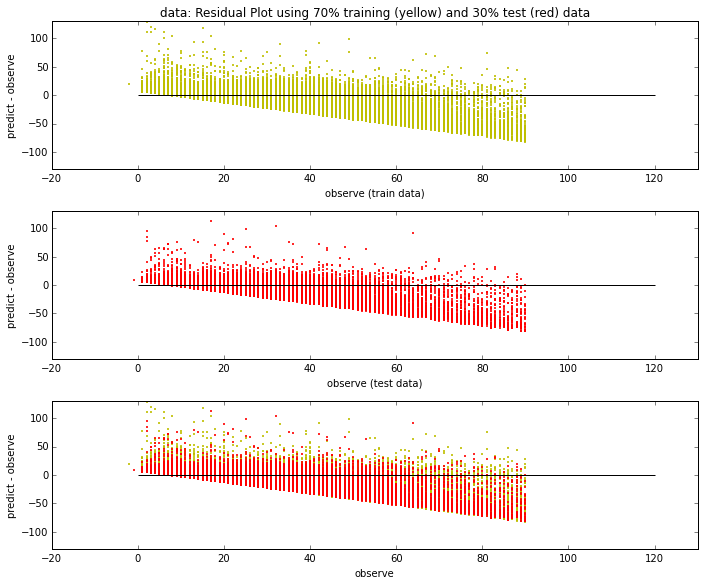

In [18]:
plt.figure(1)
plt.subplot(311)
plt.scatter(y2_train, lm2.predict(X2_train) - y2_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.title('data: Residual Plot using 70% training (yellow) and 30% test (red) data')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data)')

plt.subplot(312)
plt.scatter(y2_test, lm2.predict(X2_test) - y2_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data)')

plt.subplot(313)
plt.scatter(y2_train, lm2.predict(X2_train) - y2_train, c='y', s=1, edgecolor='y')
plt.scatter(y2_test, lm2.predict(X2_test) - y2_test, c='r', s=1, edgecolor='r')

plt.tight_layout()
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe')

plt.show()

In [ ]:
#density plots
'''
x2 = y2_test
y2 = lm2.predict(X2_test)

# Calculate the point density
start = timeit.default_timer()
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
stop = timeit.default_timer()
print 'z:', stop - start

# Sort the points by density, so that the densest points are plotted last
start = timeit.default_timer()
idx = z2.argsort()
stop = timeit.default_timer()
print 'sort data:', stop - start

x2, y2, z2 = x2[idx], y2[idx], z2[idx]
fig, ax = plt.subplots()
ax.scatter(x2, y2, c=z2, s=5, edgecolor='')

plt.axis([0, 130, 0, 130])
plt.title('Test dataset: scatter plot colored by density')
plt.ylabel('predict')
plt.xlabel('observe')

plt.show()
'''

# Plotting Scatter, by appling the dewell time model with the rest 30% data

In [38]:
df_est = []
df_est = pd.DataFrame(lm2.predict(X2_test), index = X2_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X2_test, df_est], axis=1, join='inner')
test['on+off'] = test['ONS']+test['OFFS']
test.columns

Index([u'ONS', u'OFFS', u'threedoors_artic', u'twodoors_artic', u'E', u'R',
       u'ab_pasg', u'On_twodoors_artic', u'Off_twodoors_artic',
       u'on_threedoors_artic', u'off_threedoors_artic', u'on_express',
       u'off_express', u'on_rapid', u'off_rapid', u'Dwell_Time_Esti',
       u'on+off'],
      dtype='object')

In [39]:
#Create dataframe for specific groups
test_StandardService = test[(test.threedoors_artic != 1) & (test.twodoors_artic != 1)]
test_TwoDoorsArtic = test[(test.twodoors_artic == 1)]
test_ThreeDoorsArtic = test[(test.threedoors_artic == 1)]
test_RapidRide = test[test.R == 1]
test_Express = test[test.E == 1]
test_Local = test[(test.R == 0)&(test.E == 0)]


31600 31600


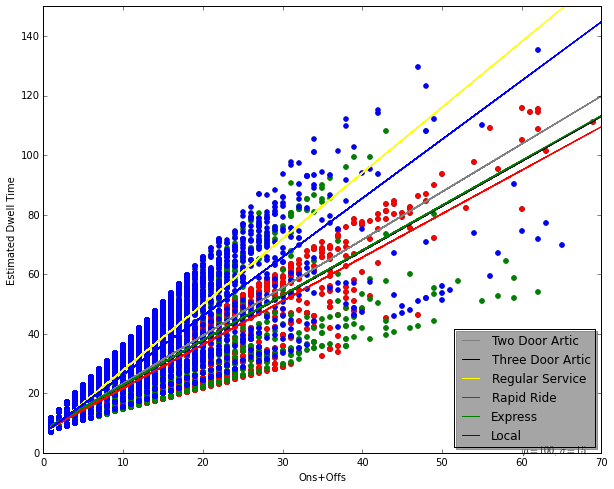

In [40]:
fig, ax = plt.subplots()

# plot the data itself
x1 = test_TwoDoorsArtic['on+off']
y1 = test_TwoDoorsArtic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'grey')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', label='Two Door Artic')

x2 = test_ThreeDoorsArtic['on+off']
y2 = test_ThreeDoorsArtic['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x2, y2, color = 'black')
#plot the trend line
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='black', label='Three Door Artic')

# plot the data itself
x3 = test_StandardService['on+off']
y3 = test_StandardService['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x3, y3, color = 'yellow')
#plot the trend line
fit = np.polyfit(x3, y3, deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color='yellow', label= 'Regular Service')

x4 = test_RapidRide['on+off']
y4 = test_RapidRide['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x4, y4, color = 'red')
#plot the trend line
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='red', label= 'Rapid Ride')

x5 = test_Express['on+off']
y5 = test_Express['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x5, y5, color = 'green')
#plot the trend line
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='green', label= 'Express')

x6 = test_Local['on+off']
y6 = test_Local['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x6, y6, color = 'blue')
#plot the trend line
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='blue', label= 'Local')



plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [41]:
#Estimate dwell time for the 'test' dataset
df_est = []
df_est = pd.DataFrame(lm2.predict(X2_test), index = X2_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X2_test, df_est], axis=1, join='inner')
test.head()

,ONS,OFFS,threedoors_artic,twodoors_artic,E,R,ab_pasg,On_twodoors_artic,Off_twodoors_artic,on_threedoors_artic,off_threedoors_artic,on_express,off_express,on_rapid,off_rapid,Dwell_Time_Esti
0,7.000,0.000,0,0,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.768
1,3.000,1.000,0,0,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.654
2,1.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.757
3,16.000,0.000,0,0,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,53.784
4,4.000,0.000,0,0,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,17.762


In [42]:
test.columns

Index([u'ONS', u'OFFS', u'threedoors_artic', u'twodoors_artic', u'E', u'R',
       u'ab_pasg', u'On_twodoors_artic', u'Off_twodoors_artic',
       u'on_threedoors_artic', u'off_threedoors_artic', u'on_express',
       u'off_express', u'on_rapid', u'off_rapid', u'Dwell_Time_Esti'],
      dtype='object')

31600 31600


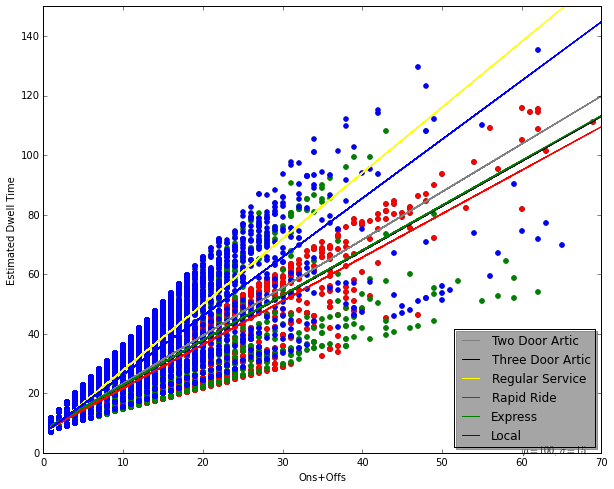

In [44]:
fig, ax = plt.subplots()

# plot the data itself
x1 = test_TwoDoorsArtic['on+off']
y1 = test_TwoDoorsArtic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'grey')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', label='Two Door Artic')

x2 = test_ThreeDoorsArtic['on+off']
y2 = test_ThreeDoorsArtic['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x2, y2, color = 'black')
#plot the trend line
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='black', label='Three Door Artic')

# plot the data itself
x3 = test_StandardService['on+off']
y3 = test_StandardService['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x3, y3, color = 'yellow')
#plot the trend line
fit = np.polyfit(x3, y3, deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color='yellow', label= 'Regular Service')

x4 = test_RapidRide['on+off']
y4 = test_RapidRide['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x4, y4, color = 'red')
#plot the trend line
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='red', label= 'Rapid Ride')

x5 = test_Express['on+off']
y5 = test_Express['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x5, y5, color = 'green')
#plot the trend line
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='green', label= 'Express')

x6 = test_Local['on+off']
y6 = test_Local['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x6, y6, color = 'blue')
#plot the trend line
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='blue', label= 'Local')



plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [ ]:
print 'end'